Flightaware (https://flightaware.com/live/fleet/LAN)

In [1]:
from robobrowser import RoboBrowser
import plotly.plotly as py
import pandas as pd
import networkx as nx
from cachier import cachier
import geocoder

browser = RoboBrowser(history=True, parser='html5lib')
base_url = 'https://flightaware.com/live/fleet/'
query = 'JAL' ## 
airlines = "LAN", "JAL", "DLH", "AAL", "CCA", 'AFR', 'IGO', 'MSR'
df = pd.DataFrame()

for query in airlines:
    print(query)
    for i in range(2):
        url = base_url + query + "?;offset=" + str(i*20)
        browser.open(url)
        table=browser.select('.prettyTable')[0]
        t=table.__str__()
        if 'Sorry' in t:
                break
        tdf=pd.read_html(t, header=1)[0]
        df = df.append(tdf)
        print(tdf.head(3))

LAN
    Ident  Type                            Origin  \
0  LAN127  A320   Cerro Moreno Int'l (ANF / SCFA)   
1  LAN149  A321               El Loa (CJC / SCCF)   
2  LAN163  A321  Diego Aracena Int'l (IQQ / SCDA)   

                                         Destination        Departure  \
0  Comodoro Arturo Merino Benitez Int'l (SCL / SCEL)  Mon 11:05AM -03   
1  Comodoro Arturo Merino Benitez Int'l (SCL / SCEL)  Mon 11:13AM -03   
2  Comodoro Arturo Merino Benitez Int'l (SCL / SCEL)  Mon 10:26AM -03   

  EstimatedArrival Time  
0       Mon 12:45PM -03  
1       Mon 01:08PM -03  
2       Mon 12:31PM -03  
JAL
   Ident  Type                             Origin  \
0  JAL18  B788          Narita Int'l (NRT / RJAA)   
1   JAL2  B77W  Tokyo Int'l (Haneda) (HND / RJTT)   
2  JAL36  B772      Singapore Changi (SIN / WSSS)   

                         Destination        Departure EstimatedArrival Time  
0             Vancouver Int'l (CYVR)  Mon 07:55PM JST       Mon 11:14AM PDT  
1          Sa

## Betweenness Centrality
![Betweenness](betweenness.png)

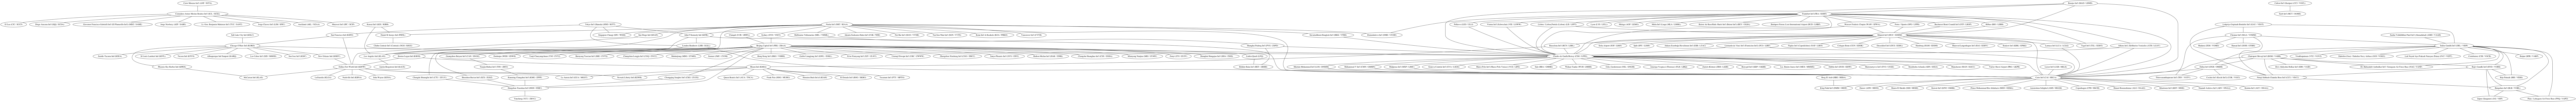

In [14]:
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
G.graph['dpi'] = 100
draw(G)

In [8]:
G = nx.from_pandas_dataframe(df, 'Origin', 'Destination')
centrality=nx.betweenness_centrality(G)
centrality

{'Albuquerque Intl Sunport (KABQ)': 0.0,
 'Amerigo Vespucci (Florence) (FLR / LIRQ)': 0.0,
 'Amsterdam Schiphol (AMS / EHAM)': 0.0,
 "Ankara Esenboğa Havalimanı Int'l (ESB / LTAC)": 0.0,
 "Athens Int'l, Eleftherios Venizelos (ATH / LGAV)": 0.0,
 'Auckland (AKL / NZAA)': 0.0,
 'Austin-Bergstrom Intl (KAUS)': 0.0,
 "Barajas Int'l (MAD / LEMD)": 0.0005337046061027964,
 "Barcelona Int'l (BCN / LEBL)": 0.06082886135792496,
 "Beijing Capital Int'l (PEK / ZBAA)": 0.2720245968209769,
 "Beirut Air Base/Rafic Hariri Int'l (Beirut Int'l) (BEY / OLBA)": 0.0,
 "Bengaluru Int'l (BLR / VOBL)": 0.0007886231415643179,
 'Biju Patnaik (BBI / VEBS)': 0.0,
 'Bilbao (BIO / LEBB)': 0.0005337046061027964,
 'Borg El Arab (HBE / HEBA)': 0.0,
 "Boryspil Int'l (KBP / UKBB)": 0.0,
 'Boston Logan Intl (KBOS)': 0.0317487431932263,
 "Bucharest Henri Coandă Int'l (OTP / LROP)": 0.0005337046061027964,
 'Budapest Ferenc Liszt International Airport (BUD / LHBP)': 0.0,
 "Cairo Int'l (CAI / HECA)": 0.3940240395409206,
 "Ca

In [21]:
from joblib import Memory
memory = Memory(cachedir='tmp', verbose=0)

@memory.cache
def get_latlng(query):
    g=geocoder.google(query)
    if g:
        return g.latlng
    else:
        return None, None
    
great_lines = []
airports = []
airport_data = []
seen=[]
great_lines_2=[]
airports = pd.DataFrame(columns=['label','lat','lon','size'])

    
i=0
for index,row in df.iterrows():
    origin = row.Origin
    destination = row.Destination
    olat, olon = get_latlng(origin)
    dlat, dlon = get_latlng(destination)
    if olat and dlat:
        if origin not in seen:
            seen.append(origin)
            print(origin, olat, olon)
        if destination not in seen:
            seen.append(destination)
            print(destination, dlat, dlon)
        great_lines.append(dict(
            type = 'scattergeo',
            lat = [ olat, dlat ],
            lon = [ olon, dlon ],
            hoverinfo = 'Ident',
                text = 'Ident',
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'rgba(255,0,0,0.2)',
                ),
                )
        )
        airports.loc[i]=[origin, olat, olon, 0.0]
        airports.loc[i+1]= [destination, dlat, dlon, 0.0]
        i+=2
     

Cerro Moreno Int'l (ANF / SCFA) -23.4486944 -70.4409348
Comodoro Arturo Merino Benitez Int'l (SCL / SCEL) -33.3911894 -70.79723539999999
El Loa (CJC / SCCF) -22.4989612 -68.90696609999999
Diego Aracena Int'l (IQQ / SCDA) -20.5364084 -70.1805181
Governor Francisco Gabrielli Int'l (El Plumerillo Int'l) (MDZ / SAME) -32.8278642 -68.7984902
Jorge Newbery (AEP / SABE) -34.5580305 -58.4170088
Jorge Chavez Int'l (LIM / SPJC) -12.0240527 -77.112036
Mataveri Int'l (IPC / SCIP) -27.158723 -109.4300364
Narita Int'l (NRT / RJAA) 35.7719867 140.3928501
Vancouver Int'l (CYVR) 49.1966913 -123.1815123
London Heathrow (LHR / EGLL) 51.4700223 -0.4542955
Tokyo Int'l (Haneda) (HND / RJTT) 35.5493932 139.7798386
San Diego Intl (KSAN) 32.7338006 -117.1933038
Suvarnabhumi Bangkok Int'l (BKK / VTBS) 13.6899991 100.7501124
Tan Son Nhat Int'l (SGN / VVTS) 10.8184631 106.6588245
Kona Intl At Keahole (KOA / PHKO) 19.736916 -156.0429246
Melbourne Tullamarine (MEL / YMML) -37.6690123 144.8410273
Daniel K Inouye Int

In [23]:
for key, item in centrality.items():
    airports.loc[airports.label==key, 'size'] = (item*100)+10
airports.head(100)

,label,lat,lon,size
0,Cerro Moreno Int'l (ANF / SCFA),-23.448694,-70.440935,10.000000
1,Comodoro Arturo Merino Benitez Int'l (SCL / SCEL),-33.391189,-70.797235,10.250609
2,El Loa (CJC / SCCF),-22.498961,-68.906966,10.000000
3,Comodoro Arturo Merino Benitez Int'l (SCL / SCEL),-33.391189,-70.797235,10.250609
4,Diego Aracena Int'l (IQQ / SCDA),-20.536408,-70.180518,10.000000
5,Comodoro Arturo Merino Benitez Int'l (SCL / SCEL),-33.391189,-70.797235,10.250609
6,Comodoro Arturo Merino Benitez Int'l (SCL / SCEL),-33.391189,-70.797235,10.250609
7,Diego Aracena Int'l (IQQ / SCDA),-20.536408,-70.180518,10.000000
8,Comodoro Arturo Merino Benitez Int'l (SCL / SCEL),-33.391189,-70.797235,10.250609
9,Governor Francisco Gabrielli Int'l (El Plumeri...,-32.827864,-68.798490,10.000000


In [22]:

    
airport_markers = [ dict(
        type = 'scattergeo',
        lon = airports['lon'],
        lat = airports['lat'],
        hoverinfo = 'label',
        text = airports['label'],
        mode = 'markers',
        marker = dict( 
            size=airports['size'], 
            color='red',   
        ))]
    
layout = dict(
        title = 'Vuelos',
        width = 800,
        height = 800,
        showlegend = False, 
        showocean = True,
        oceancolor = '#acf',
        showland = True,
        geo = dict(
            projection = dict( 
                type = 'orthographic',          
            ),
            
        )
    )
    
fig = dict( data=great_lines+airport_markers, layout=layout )
py.iplot( fig, validate=False, filename='d3-globe' )

In [24]:
layout = dict(
        title = 'Great lines over globe<br>(Click and drag to rotate)',
        showlegend = False,  
        width = 800,
        height = 800,
        geo = dict(
            
            showland = True,
            showcountries = True,
            showocean = True,
            countrywidth = 0.5,
            landcolor = '#fff',
            oceancolor = '#eee',
            projection = dict( 
                type = 'orthographic',
                rotation = dict(
                    lon = -100,
                    lat = 40,
                    roll = 0
                )            
            ),
            
        )
    )
    
fig = dict( data=great_lines+airport_markers, layout=layout )
py.iplot( fig, validate=False, filename='d3-globe' )